In [15]:
from sklearn import metrics, linear_model, datasets
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

### Linear Regression

![Works on my localhost :)](img/linear_reg.png)

- Datapoints are linear in nature
- The line is linear and near to the datapoints, aka as R2
- Since, its linear - its of the form y=mx + b
- b is the intercept point of R2 on y-axis
- m is the slope (dy/dx)
- x is any valid datapoint

### Ex: BostonHousing

In [7]:
boston = datasets.load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [6]:
X = boston.data
y = boston.target
print(X.shape)
y.shape


(506, 13)


(506,)

In [8]:
lreg = linear_model.LinearRegression()
lreg

LinearRegression()

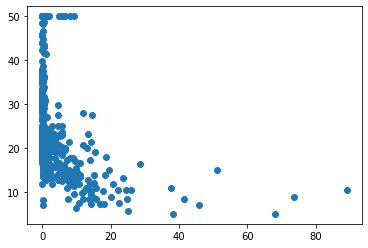

In [11]:
plt.scatter(X[:, 0], y) #all columns, but zeroth(first) row -> as good as X.T[0], X is (506, 13) and X.T becomes(13, 506)
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
model = lreg.fit(X_train, y_train)
pred = model.predict(X_test)
print('Predictions: ', pred)
print('Actual values: ', y_test)
print('R^2: ', lreg.score(X, y))
print('Co_eff : ', lreg.coef_)
print('Intercept: ', lreg.intercept_)

Predictions:  [29.66226213 22.21999203 23.04449346 24.03366197 13.22391202 29.11181492
 20.24430227 23.8326099   0.46289965 11.33688519 29.05749532 31.57172645
 30.56850041 11.80014849 19.96265909 24.98457503 12.58499439 35.34868267
 26.50435033 22.89430285 17.45269412 24.65341498 32.78009189 22.77348532
 20.31349199 22.12974163 13.36915425 43.64471963 32.96754601 37.67981847
 16.92059777 28.17702551 26.74090194 28.74522941 20.91809407 25.42639314
 16.04685102 26.04976533 22.58779546 22.8173867  19.01157618 20.50348521
 28.75497277 31.29838982 19.08685226 26.32702106 17.20993047 29.39619466
 26.85833099 32.13876236 12.60612561 18.72564766 23.81975682 24.88117473
 18.72278714 22.97527251 11.03824588 25.1860721  12.42434976 20.44057108
 21.65398133 11.29519854 23.19362979 16.92786994 17.40610727 24.01927267
 17.29168058 22.06107135 18.85820211 14.01988973 19.46911229  6.2522372
 14.65081347 12.00926271 24.52242533 17.59664487 20.72945327 22.56679984
 30.89753218 21.19988751  8.73540786 1

In [37]:
import numpy as np
demo_test = np.array([[0.028, 28.00, 15.04, 0, 0.460, 6.211, 28.90, 3.66, 4.00, 270.0, 18.20, 396.33, 6.21]])

demo_pred = model.predict(demo_test)
demo_pred
# this is how a typical user-input would work. For confirmation, demo_test is actually X[0] and pred is as same as y[0]
#NOICEE!!

array([29.74120039])

---

### Logistic Regression

![Works on my localhost :)](img/logistic_reg1.png)

- In this case linear regression doesn't make any sense because, datapoints are scattered
- Any other point far from the training set becomes insignificant
- In this, we make use of logistic regression
- The line is linear, so y = mx + b, but y will be applied in logit function, **logit(y)**

![Works on my localhost :)](img/logistic_reg2.png)

**logit(y) = 1/(1+e^-y)**
- if y < 1, e^(-ve integer) is more than 1 and 1/(more than 1) will result in 0.*something*, thus values at the bottom
- if y > 1, e^(+ve integer) is less than 1 and 1/(less than 1) will result in 1.*something*, thus values at the top
- Ergo, logit(y) is a **Sigmoid Function**

### CreditCard Fraud Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [3]:
df = pd.read_csv('datasets/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df[['Time', 'Amount', 'Class']].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [5]:
df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [6]:
notfraud=0
for i in range(len(df['Class'])):
    if df['Class'][i] == 0:
        notfraud+=1

print((notfraud/len(df['Class']))*100, '% of the dataset has not-fraud values')
print(100-(notfraud/len(df['Class']))*100, '% of the dataset has fraud values')

99.82725143693798 % of the dataset has not-fraud values
0.17274856306201514 % of the dataset has fraud values


C:\Users\ankan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Amount', ylabel='Density'>

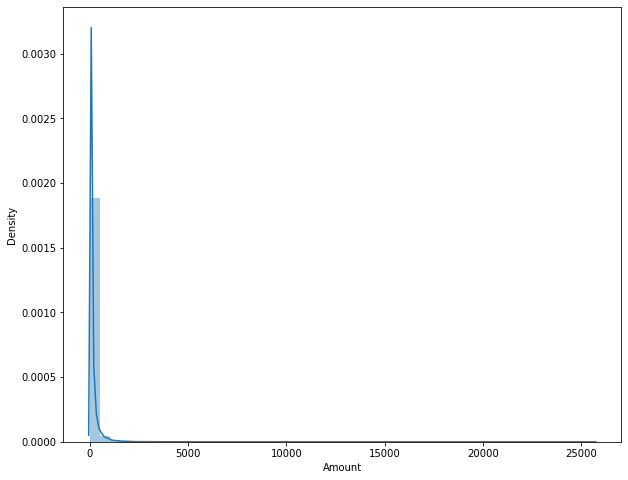

In [8]:
plt.figure(figsize=(10,8))
sns.distplot(df['Amount'])

Text(0, 0.5, 'Time')

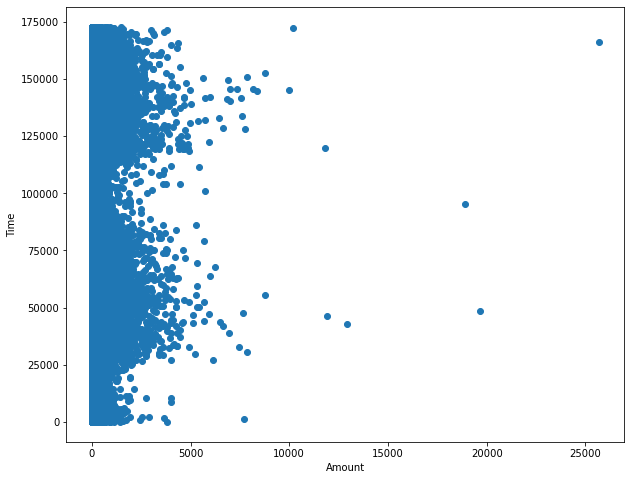

In [13]:
plt.figure(figsize=(10,8))
plt.scatter(df['Amount'], df['Time'])
plt.xlabel('Amount')
plt.ylabel('Time')

In [19]:
#Model training
X = df.drop(['Class'], axis=1) # obv, we don't want o/p in training set
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)  

C:\Users\ankan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
y_pred = log_reg.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
print(log_reg.score(X_test, y_test))
accuracy_score(y_test, y_pred)


0.9992099996488887


0.9992099996488887

In [42]:
confusion_matrix(y_pred, y_test)

array([[56856,    24],
       [   21,    61]], dtype=int64)